# 1. Install and import libraries

In [1]:
# #instaloader is a python tool that downloads posts from instagram
# #uncomment this block to install
#pipinstall instaloader

In [2]:
import instaloader
import time
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# #uncomment this block to create an instance on instaloader and login to instagram
# #create an instance
# # Use parameters to save diffrent metadata; chose to omit videos
# dl = instaloader.Instaloader(download_videos=False, save_metadata=False)

# # Optionally, login or load session
# # test.login('USER', 'PASSWORD')        # (static login)
# dl.interactive_login('USER') 

## 2. List of top fashion influencers in Singapore

List of top 100 Singapore fashion influencers (by follower count), that has fashion content in their instagram. Some of these influencers might also discuss other topics like food, pets etc, which are not closely related to fashion and we might want to omit them. Additionally, we will focus on female influencers for this project. There are also a few accounts that seem to be tagged wrongly either to the topic, or the location, and I will be manually removing them. ([*source*](https://starngage.com/app/global/influencer/ranking/singapore/fashion))

In [4]:
# Load list of insta accounts
insta_acc = pd.read_csv('../data/instagram_handles.csv')

In [5]:
#Take a quick look at the top 5 rows of the dataset
insta_acc.head()

,name,handle,topics,follower_count,to_exclude_pets_food
0,Jamie Chua 蔡欣颖,ec24m,Photography Travel Fashion Design Celebrities,1200000,0
1,Diya Vj,diya_menon_official,Modeling Fashion Photography,600900,0
2,Jeanette Aw 欧萱,jeanetteaw,Food Fashion Lifestyle,413300,1
3,胡佳琪 Jayley Woo,jiaqiwoo,Fashion Styling Lifestyle,409700,0
4,Rebecca Lim 林慧玲,limrebecca,Actors Fashion Art Modeling,408400,0


In [6]:
#check size of dataset
insta_acc.shape

(100, 5)

In [7]:
#keep only influencers that do not post about pets or food, as explained in markdown cell above

insta_acc = insta_acc.loc[insta_acc['to_exclude_pets_food'] == 0]
insta_acc.shape

(76, 5)

In [8]:
#remaining accounts after excluding pets and food related accounts
accounts = insta_acc['handle'].tolist()
accounts

['ec24m',
 'diya_menon_official',
 'jiaqiwoo',
 'limrebecca',
 'taufikbatisah',
 'speishi',
 'gourmetartistry',
 'dreachong',
 'carriewst',
 'kimlimhl',
 'novitalam',
 'julietan_cxq',
 'mongabong',
 'aureliang_',
 'xplacidacidx',
 'melissackoh',
 'katherinaolivia',
 'nicolekittykatx',
 'sylsylnoc',
 'elegantstylesfashion',
 'zoetay10',
 'xubin_',
 'hayleywoojiayi',
 'yahuiyh',
 'denisesoongeelyn',
 'rchlwngxx',
 'saffronsharpe',
 'euniceannabel',
 'katepang311',
 'honglingg_',
 'norfasarie',
 'elaineruimin',
 'trishachatterjee09',
 'mirchelley',
 'sleepy.tofu',
 'sheila_sim',
 'shanepowxp',
 'milapanpinij',
 'fionafussi',
 'cheyennechesney',
 'soniachew',
 'narellekheng',
 'ohhowstrange',
 'andeecys',
 'garimpandodicas',
 'xoxoapo',
 'jacelyn_tay',
 'xinlinnn',
 'kym_ng',
 'sophiachong',
 'alluradesign',
 'theeditorsmarket',
 'jeanettewn',
 'graceyuki',
 'ms_rach',
 'martinapagani',
 'anna_en',
 'theclosetlover',
 'jamiepang',
 'mingbridges',
 'charlottelum',
 'polkadope',
 'aimeecheng

In [9]:
#manually identify some that do not seem to be tagged correctly to fashion or to Singapore
#also remove blogshops since they are our target clients who want to predict color trends
#remove males

wrong_tag = ['gourmetartistry','diya_menon_official','martinapagani','katherinaolivia','sylsylnoc','elegantstylesfashion','norfasarie','trishachatterjee09','sleepy.tofu','milapanpinij',
 'garimpandodicas','kym_ng','sophiachong','alluradesign','jeanettewn']
blogshops = ['theeditorsmarket','theclosetlover']
male = ['taufikbatisah','xubin_','felixgerlach','shanepowxp','andeecys']
to_remove = wrong_tag + blogshops + male
to_remove

['gourmetartistry',
 'diya_menon_official',
 'martinapagani',
 'katherinaolivia',
 'sylsylnoc',
 'elegantstylesfashion',
 'norfasarie',
 'trishachatterjee09',
 'sleepy.tofu',
 'milapanpinij',
 'garimpandodicas',
 'kym_ng',
 'sophiachong',
 'alluradesign',
 'jeanettewn',
 'theeditorsmarket',
 'theclosetlover',
 'taufikbatisah',
 'xubin_',
 'felixgerlach',
 'shanepowxp',
 'andeecys']

In [10]:
# final list of accounts
for acc in to_remove:
    if acc in accounts:
        accounts.remove(acc)


In [11]:
len(accounts)

54

In [12]:
# # DO NOT USE: leaving the code here in case the bug is resolved in future
# #for loop to go through all target accounts cannot work
# #download_profile downloads ALL posts from each account and limit is easily hit when we do a for loop
# #timed loop also did not work, hence will have to download account by account
# #and manually stop the request when all 2021 posts are downloaded for each account



# #timedloop
# seconds = 60
# for acc in accounts:
#     start_time = time.time()
#     while True:
#         current_time = time.time()
#         elapsed_time = current_time - start_time
#         while not elapsed_time > seconds:
#             current_time = time.time()
#             elapsed_time = current_time - start_time
#             dl.download_profile(acc)

In [13]:
# # DO NOT USE: leaving the code here in case the bug is resolved in future
# #the following code from instaloader documentation to extract posts by date also did not work
# #leaving the code here in case the bug is resolved in future
# from datetime import datetime
# from itertools import dropwhile, takewhile

# import instaloader

# L = instaloader.Instaloader()

# posts = instaloader.Profile.from_username(L.context, "soulshiok").get_posts()

# SINCE = datetime(2021, 1, 1)
# UNTIL = datetime(2021, 11, 1)

# for post in takewhile(lambda p: p.date > UNTIL, dropwhile(lambda p: p.date > SINCE, posts)):
#     print(post.date)
#     L.download_post(post, '#soulshiok')

In [14]:
#due to the manual nature of extraction, will limit to top 34 accounts
top_accounts = accounts[:34]
top_accounts

['ec24m',
 'jiaqiwoo',
 'limrebecca',
 'speishi',
 'dreachong',
 'carriewst',
 'kimlimhl',
 'novitalam',
 'julietan_cxq',
 'mongabong',
 'aureliang_',
 'xplacidacidx',
 'melissackoh',
 'nicolekittykatx',
 'zoetay10',
 'hayleywoojiayi',
 'yahuiyh',
 'denisesoongeelyn',
 'rchlwngxx',
 'saffronsharpe',
 'euniceannabel',
 'katepang311',
 'honglingg_',
 'elaineruimin',
 'mirchelley',
 'sheila_sim',
 'fionafussi',
 'cheyennechesney',
 'soniachew',
 'narellekheng',
 'ohhowstrange',
 'xoxoapo',
 'jacelyn_tay',
 'xinlinnn']

In [15]:
final_acct_df = pd.DataFrame(top_accounts, columns = ['handle'])
final_acct_df

,handle
0,ec24m
1,jiaqiwoo
2,limrebecca
3,speishi
4,dreachong
5,carriewst
6,kimlimhl
7,novitalam
8,julietan_cxq
9,mongabong


In [16]:
final_acct_df = final_acct_df.merge(insta_acc, how='left', on='handle')
final_acct_df.drop(columns='to_exclude_pets_food')

,handle,name,topics,follower_count
0,ec24m,Jamie Chua 蔡欣颖,Photography Travel Fashion Design Celebrities,1200000
1,jiaqiwoo,胡佳琪 Jayley Woo,Fashion Styling Lifestyle,409700
2,limrebecca,Rebecca Lim 林慧玲,Actors Fashion Art Modeling,408400
3,speishi,SOH PEI SHI 苏培诗,Fashion Lifestyle Beauty,346800
4,dreachong,Andrea Chong,Fashion Styling Lifestyle,305500
5,carriewst,Carrie Wong 黄思恬,Fashion Modeling Lifestyle,297400
6,kimlimhl,K I M L I M,Fashion Lifestyle Design Technology Celebritie...,288200
7,novitalam,Novita Lam,Fashion,286300
8,julietan_cxq,Julie Tan 陈欣淇,Actors Modeling Fashion,283100
9,mongabong,Mongchin Yeoh,Art Beauty Fashion,281200


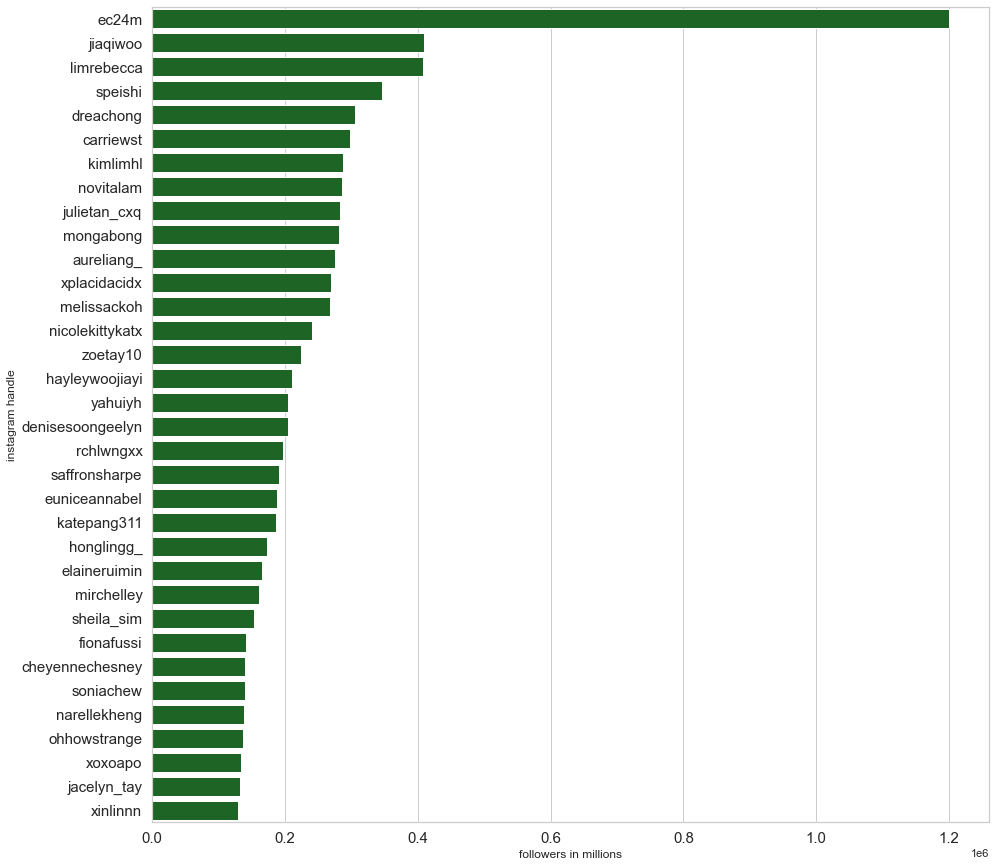

In [56]:
# plot bar chart of follower_count for each influencer to see distribution
# initialize the matplotlib figure
sns.set_theme(style='whitegrid')
f, ax = plt.subplots(figsize=(15, 15))

sns.set_color_codes('dark')
sns.barplot(x='follower_count', y='handle', data=final_acct_df, color='g')
plt.xlabel('followers in millions')
plt.ylabel('instagram handle')
plt.tick_params(labelsize= 15);

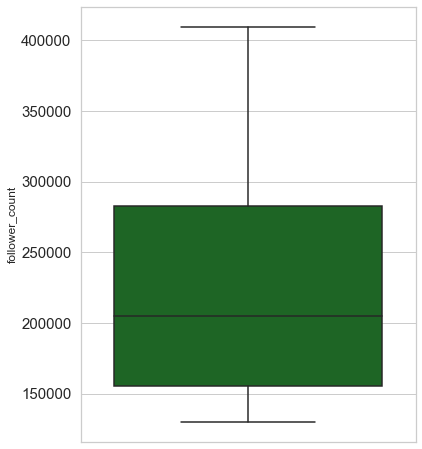

In [60]:
#boxplot of follower count removing outliers
f, ax = plt.subplots(figsize=(6, 8))
sns.boxplot(y='follower_count', data=final_acct_df, color='g', showfliers = False)
plt.tick_params(labelsize= 15);

ec24m is an outlier with 1.2mn followers. The bulk of the top 34 influencers selected have between 150-280k followers, which is also very sizeable. Assuming that the follower count is genuine, this set of influencers should be suitable for this project, where we need to select influencers which have a wide reach and can impact fashion trends in Singapore

In [18]:
#export final 34 accounts and information to csv
final_acct_df.to_csv('../data/final_acct_df.csv', index = False)

# 3. Download from Instagram

In [19]:
# #uncomment to run code below to download for each individual account
# #manually stop the process when the necessary posts are downloaded for each account
# #then change the handle name to the next account

# dl.download_profile('xinlinnn')

The files will be saved in the same folder as this notebook, organised into folders by instagram handle. Please transfer these subfolders into a parent folder at '../pictures/date_filtered_from_insta' for better housekeeping
